# 2019-07-17 Pancreas data for fig 3
# 

In [2]:
import pandas as pd
import numpy as np
import loompy
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec
import matplotlib as mpl
import imp
import sys

sys.path.append('/home/bojk/Data/minimeta_pyfiles/')
import semiAnnotate_main as sam
import semiAnnotate_Sankey as sank
import semiAnnotate_dotplot as sdot
import get_timestamp as time

In [3]:
# load data
# Bob Jones Tumor Pancreas dataset (to be annotated)
TuPa_count_path = '../leidenalg/Datasets/TuPaMetaDataDivya/CombinedCountTable.csv'
TuPa_counttable = pd.read_csv(TuPa_count_path,index_col=0)
TuPa_meta = pd.read_csv('../leidenalg/Datasets/TuPaMetaDataDivya/metadata.csv',sep=',',index_col=0)
tsne_coords  = pd.read_csv('../leidenalg/Datasets/TuPaMetaDataDivya/tSNEcoordinates.csv',index_col=0)
TuPa_meta = TuPa_meta.join(tsne_coords)

# switch index from ENSG number to gene name 
translate = pd.read_csv('../leidenalg/Datasets/mart_export.txt',sep='\t')
lut = dict(zip(translate['Gene stable ID'],translate['Gene name']))
TuPa_counttable.rename(index=lut,columns=str,inplace=True)
#  Pancreas data (adult aging to be used as atlas)
AA_count_path = '../leidenalg/Datasets/AdultAgingPancForCIRM/AdultAgeingCountTable.csv'
AA_counttable = pd.read_csv(AA_count_path,index_col=0)
AA_meta = pd.read_csv('../leidenalg/Datasets/AdultAgingPancForCIRM/pancreas_adult_annotation_table.csv')
AA_meta['idx'] = 'X'+AA_meta['c1_chip_id'].astype(str)+'.'+AA_meta['capture_position']
AA_meta.set_index('idx',inplace=True)

AAtsne = pd.read_csv('../leidenalg/Datasets/AdultAgingPancForCIRM/AdultAgeingTSNETable.csv',sep=',')
AAtsne.set_index(AAtsne['Unnamed: 0'].str[1:],inplace=True)
AAtsne.index = 'X'+AAtsne.index
AAtsne.rename(index=str,columns={'Unnamed: 1': 'Dim1','Unnamed: 2':'Dim2'},inplace=True)
AA_meta = AA_meta.join(AAtsne[['Dim1','Dim2','celltypes']],how='inner')
AA_meta.dropna(how='all',axis=1,inplace=True)

TuPa_meta.rename(index=str, columns={'annotation':'celltypes'},inplace=True)

In [62]:
savedir = '../leidenalg/Datasets/Pancreas/'
print(len(AA_meta))
AA_meta.celltypes.value_counts()

2542


alpha          998
acinar         411
ductal         389
beta           347
unsure         262
delta           82
mesenchymal     53
Name: celltypes, dtype: int64

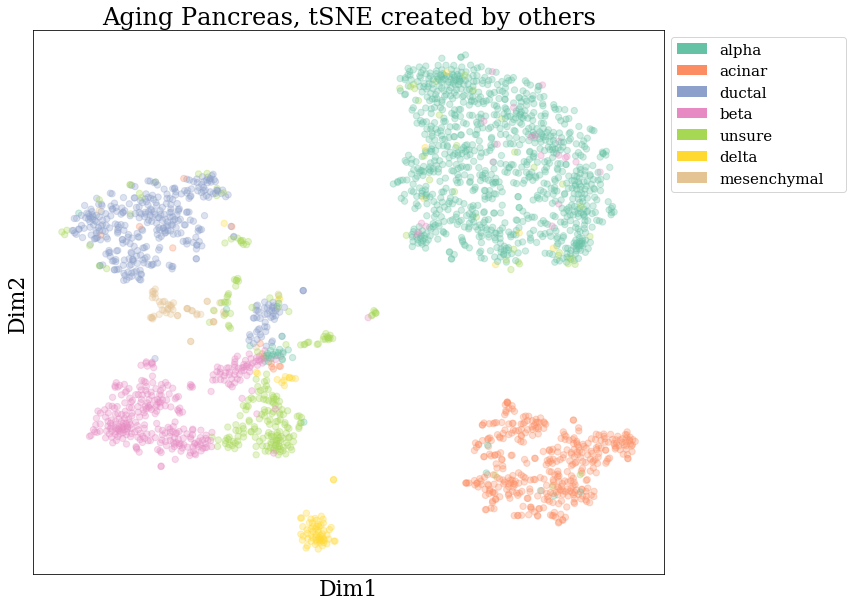

In [63]:
keys = list(AA_meta.celltypes.value_counts().index); values = sns.color_palette('Set2',len(keys))
lut = dict(zip(keys,values))
colors = AA_meta.celltypes.map(lut)

f = plt.figure(figsize=(12,10))
gs = gridspec.GridSpec(1,1)
ax = f.add_subplot(gs[0,0])
AA_meta.plot.scatter('Dim1','Dim2',ax=ax,color=colors,s=40,alpha=.3)#,label=colors.keys)
for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.yticks([]);plt.xticks([])
plt.title('Aging Pancreas, tSNE created by others')
plt.gcf().subplots_adjust(left=.05,right=0.78)
plt.show()
f.savefig(savedir+'Atlas_tSNE_cellTypes.png')

# removing 'unsure' cell class from data

In [9]:
AA_newmeta = AA_meta[AA_meta['celltypes']!='unsure'].copy()
len(AA_newmeta)

2280

# no self-edging

In [77]:
imp.reload(sam)
date = time.datenum_complete()


atlasgenes = 20
atlasweights = 20

keys = ['cell type column','number of features cell type','number of features new data'
        ,'weights_atlas_cells','timestamp','savedir']
values = ['celltypes',atlasgenes,500,atlasweights,date,savedir]
kwds = dict(zip(keys,values))
matrix,weights, AA_newmeta,TuPa_meta = sam.normmerge_twoCounttables(AA_counttable,
                                                                             AA_newmeta, TuPa_counttable, TuPa_meta, **kwds)
matrix_feature_selected = sam.feature_select(matrix.dropna(how='all',axis=1),AA_newmeta,**kwds)

kwds['threshold_neigborhood'] = thresn = .8  
kwds['n_pcs'] = n_pcs = 20 
kwds['resolution_parameter'] = respar = .0008 
kwds['self_edging'] = False

tsnedf, class_numbers,vals,wdm = sam.semiAnnotate_to_pca_to_tsnedf(matrix_feature_selected,weights,AA_newmeta,TuPa_meta,**kwds)

-------------------------------------------
genes to be removed from counttable:
['BIVM-ERCC5', 'ERCC-00002', 'ERCC-00003', 'ERCC-00004', 'ERCC-00009', 'ERCC-00012', 'ERCC-00013', 'ERCC-00014', 'ERCC-00016', 'ERCC-00017', 'ERCC-00019', 'ERCC-00022', 'ERCC-00024', 'ERCC-00025', 'ERCC-00028', 'ERCC-00031', 'ERCC-00033', 'ERCC-00034', 'ERCC-00035', 'ERCC-00039', 'ERCC-00040', 'ERCC-00041', 'ERCC-00042', 'ERCC-00043', 'ERCC-00044', 'ERCC-00046', 'ERCC-00048', 'ERCC-00051', 'ERCC-00053', 'ERCC-00054', 'ERCC-00057', 'ERCC-00058', 'ERCC-00059', 'ERCC-00060', 'ERCC-00061', 'ERCC-00062', 'ERCC-00067', 'ERCC-00069', 'ERCC-00071', 'ERCC-00073', 'ERCC-00074', 'ERCC-00075', 'ERCC-00076', 'ERCC-00077', 'ERCC-00078', 'ERCC-00079', 'ERCC-00081', 'ERCC-00083', 'ERCC-00084', 'ERCC-00085', 'ERCC-00086', 'ERCC-00092', 'ERCC-00095', 'ERCC-00096', 'ERCC-00097', 'ERCC-00098', 'ERCC-00099', 'ERCC-00104', 'ERCC-00108', 'ERCC-00109', 'ERCC-00111', 'ERCC-00112', 'ERCC-00113', 'ERCC-00116', 'ERCC-00117', 'ERCC-00

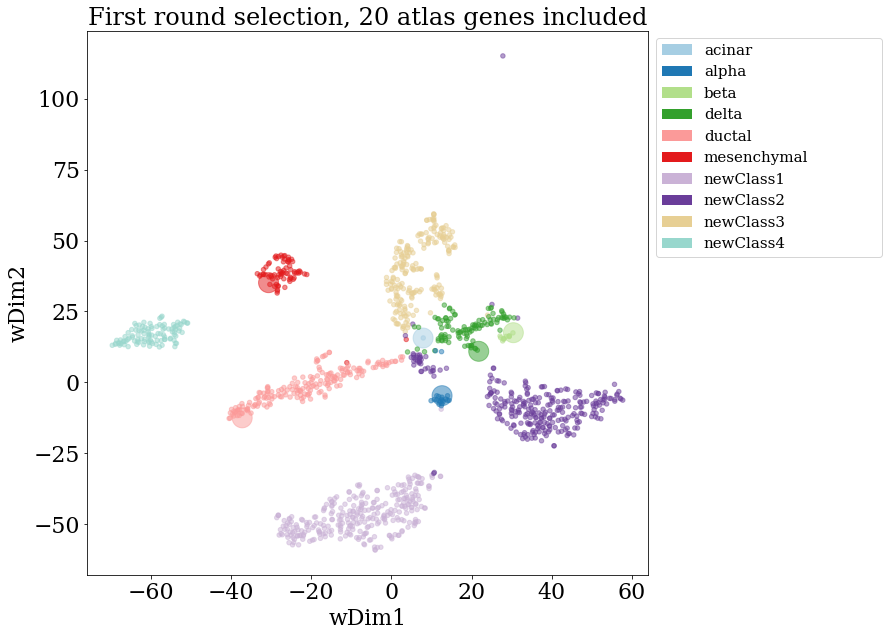

In [78]:
values = sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired',12)[8:10]+sns.color_palette('BrBG',len(class_numbers)-8)
newlut = dict(zip(class_numbers,values))
newcolor = tsnedf['class'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
tsnedf.plot.scatter('wDim1','wDim2',s=weights*20
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,vals,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig(savedir+date+'/semiAnnotate_nofetal_noselfEdges_equalweight_tSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.png')
f.savefig(savedir+date+'/semiAnnotate_nofetal_noselfEdges_equalweight_tSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.pdf')

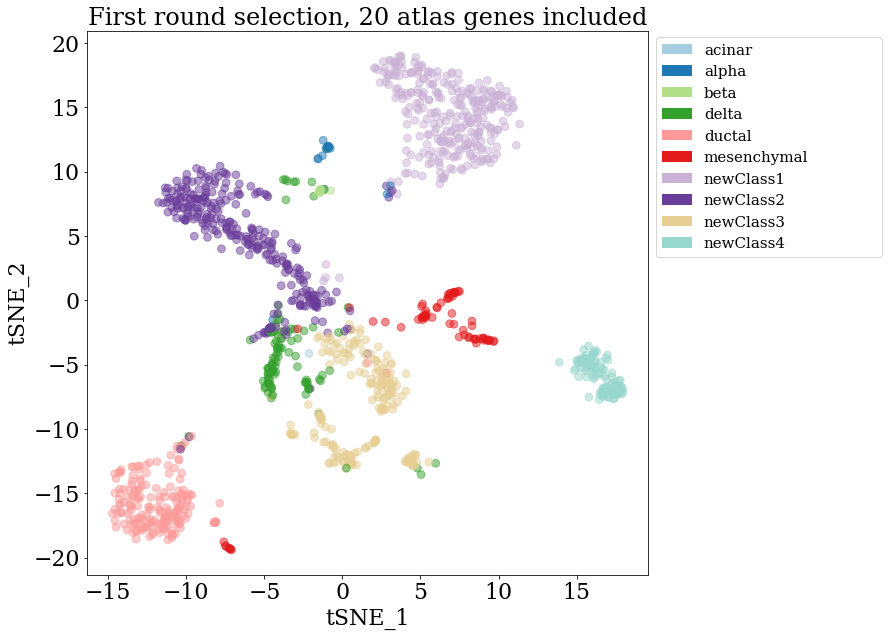

In [79]:
idx = tsnedf[6:].index
TuPa_meta.loc[idx,'new_membership'] = tsnedf.iloc[6:]['new_membership']
# new results mapped onto old tSNE
newlut = dict(zip(vals,sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired', 10)[8:10]+sns.color_palette('BrBG',len(vals)-8)))
newcolor = TuPa_meta['new_membership'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
TuPa_meta.plot.scatter('tSNE_1','tSNE_2',s=60
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig(savedir+date+'/semiAnnotate_noselfEdges_equalweight_origtSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.png')
f.savefig(savedir+date+'/semiAnnotate_noselfEdges_equalweight_origtSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.pdf')

# with self-edging

In [80]:
#imp.reload(li)
#imp.reload(semiannotate)
kwds['self_edging'] = True
tsnedfSE, class_numbersSE,valsSE,wdmSE = sam.semiAnnotate_to_pca_to_tsnedf(matrix_feature_selected,weights,AA_newmeta,TuPa_meta,**kwds)   

-------------------------------------------
perfoming weighted PCA
-------------------------------------------
perfoming tSNE
assigned default perplexity of 20
tSNE done.
-------------------------------------------
-------------------------------------------
perfoming UNweighted PCA
-------------------------------------------
perfoming tSNE
tSNE done.
-------------------------------------------


In [81]:
tsnedfSE['new_membership'].value_counts()
#tsnedfSE['original_membership'].value_counts()

delta          306
newClass1      301
newClass2      287
newClass3      187
newClass4      105
mesenchymal     75
alpha           32
ductal           2
acinar           2
beta             1
Name: new_membership, dtype: int64

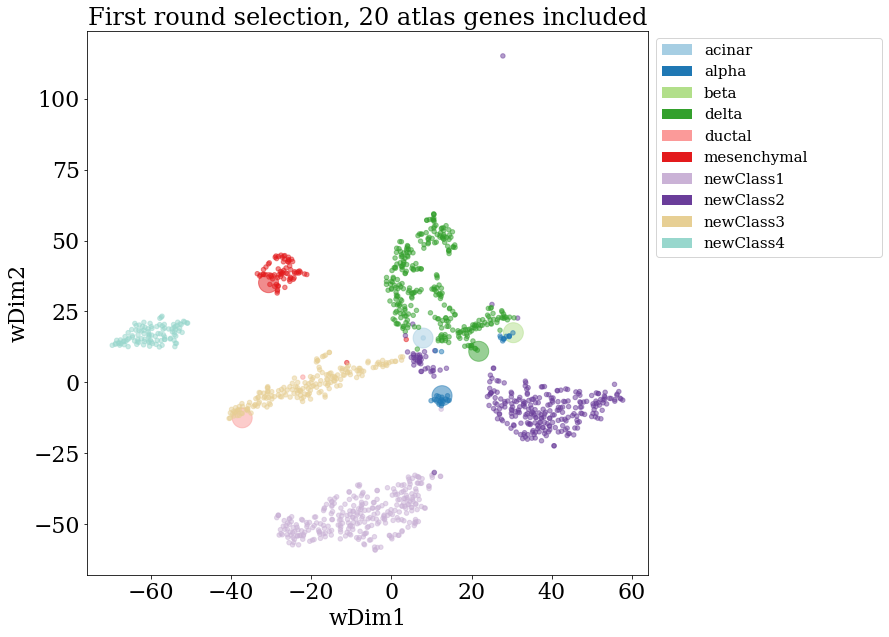

In [82]:
values = sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired',12)[8:10]+sns.color_palette('BrBG',len(class_numbersSE)-8)
newlut = dict(zip(class_numbersSE,values))
newcolor = tsnedfSE['class'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
tsnedfSE.plot.scatter('wDim1','wDim2',s=weights*20
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,valsSE,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig(savedir+date+'/semiAnnotateSE_selfEdges_weightsEq_tSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.png')
f.savefig(savedir+date+'/semiAnnotateSE_selfEdges_weightsEq_tSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.pdf')

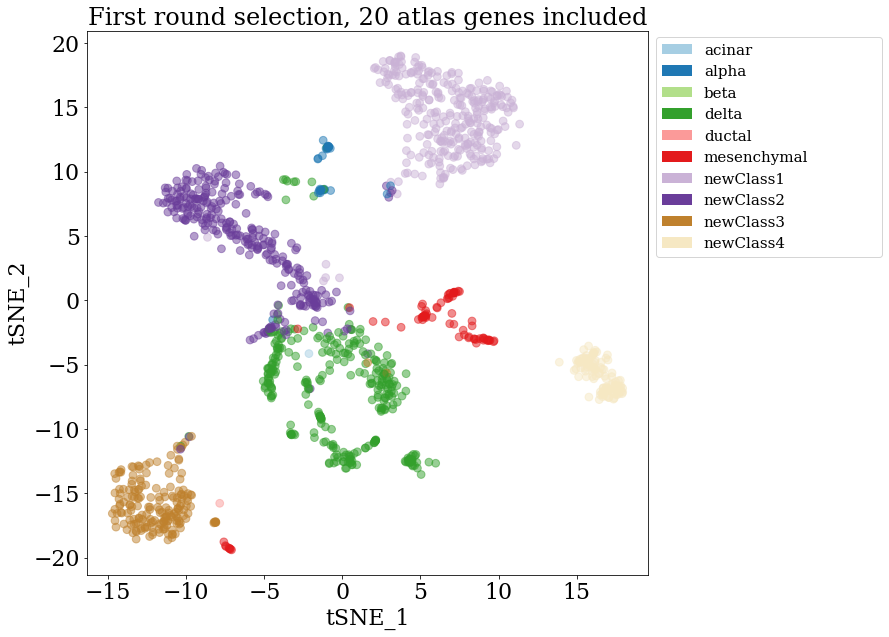

In [83]:
idx = tsnedf[6:].index
TuPa_meta.loc[idx,'new_membershipSE'] = tsnedfSE.iloc[6:]['new_membership']
# new results mapped onto old tSNE
newlut = dict(zip(valsSE,sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired',12)[8:10]+sns.color_palette('BrBG',len(valsSE)-6)))
newcolor = TuPa_meta['new_membershipSE'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
TuPa_meta.plot.scatter('tSNE_1','tSNE_2',s=60
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig(savedir+date+'/semiAnnotate_selfEdges_equalweight_origtSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.png')
f.savefig(savedir+date+'/semiAnnotate_selfEdges_equalweight_origtSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'.pdf')

# check stability - this re-initializes semiAnnotate(!)

In [84]:
# uses same dict as above

dim = len(matrix_feature_selected.T)
trials = 20
b = c = np.ndarray([trials,dim,dim],np.int32)


for i in range(trials):
    #values = ['Cell_type',30,500,.8,20,respar[i],True]
    
    #ts, class_numSE,valSE,wdmSE= li.semiAnnotate_to_pca_to_tsnedf(matrix_feature_selected,weights,BA_newmeta,GBM_meta,**kwds)
    ts, class_numSE,valSE = sam.semiAnnotate_using_tsnedf(matrix_feature_selected,weights,AA_newmeta,TuPa_meta,tsnedfSE,**kwds)
    newdf2 = ts.copy()
    newdf2['class2'] = newdf2['class']+1
    df = pd.pivot_table(newdf2,values='class2',index=newdf2.index,columns='new_membership',aggfunc=np.count_nonzero).fillna(0).copy()                     
    a = df.T.corr().values
    b[i][:][:] = a
    #c[i][:][:] = np.corrcoef(a)

    
average_df = pd.DataFrame(np.average(b,axis=0),index=df.index,columns=df.index)
#average_corr = pd.DataFrame(np.average(c,axis=0),index=df.index,columns=df.index)
drop_idx = average_df[(average_df[average_df==1].sum()==1)].index
stable_pairs = average_df.drop(drop_idx).drop(drop_idx,axis=1)
stablep = stable_pairs[stable_pairs==1].fillna(0)

# select groups with same size as value counts (this avoids me having to perform hierarchical clustering)
idx = stablep.sum().value_counts().index.astype(int)
val = stablep.sum().value_counts().values
df = pd.DataFrame(index=range(len(idx)), columns=['idx','val'])
df['idx'] = idx;df['val'] = val
groups = df[df.eq(df.iloc[:, 0], axis=0).all(1)==True].idx.values

idxs = []
for cluster in groups:
    idxs.append(list(stablep[stablep.sum()==cluster].index))
clusterdict = dict(zip(groups,idxs))

13


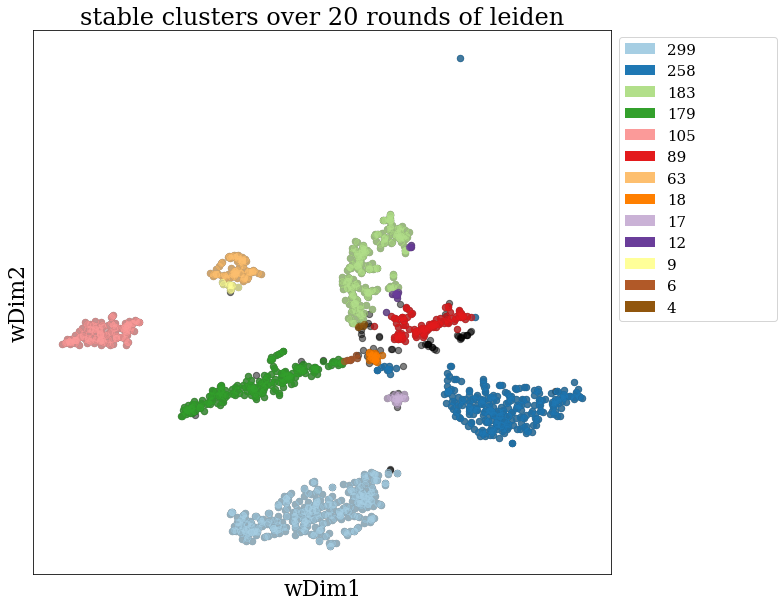

In [85]:
print(len(groups))
numgr = 20
groupi = groups[:numgr] # take the 11 largest groups


if numgr<=12:
    values = sns.color_palette('Paired',len(groupi))
else:
    values = sns.color_palette('Paired',12)+sns.color_palette('BrBG',numgr-12)
lut = dict(zip(groupi,values))

f,ax = plt.subplots(figsize=(11,10))

tsnedfSE.plot.scatter('wDim1','wDim2',ax=ax,color='k',s=2*20,alpha=.5)
for group in groupi:
    idxes = clusterdict[group]
    tsnedfSE.loc[idxes].plot.scatter('wDim1','wDim2',ax=ax,color=lut[group],s=40,alpha=.6)

for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.yticks([]);plt.xticks([])
plt.title('stable clusters over '+str(trials)+' rounds of leiden')
plt.gcf().subplots_adjust(left=.05,right=0.78)
plt.show()
f.savefig(savedir+date+'/semiAnnotateStability_'+str(numgr)+'largestGroups'+date+'.png')
f.savefig(savedir+date+'/semiAnnotateStability_'+str(numgr)+'largestGroups'+date+'.pdf')

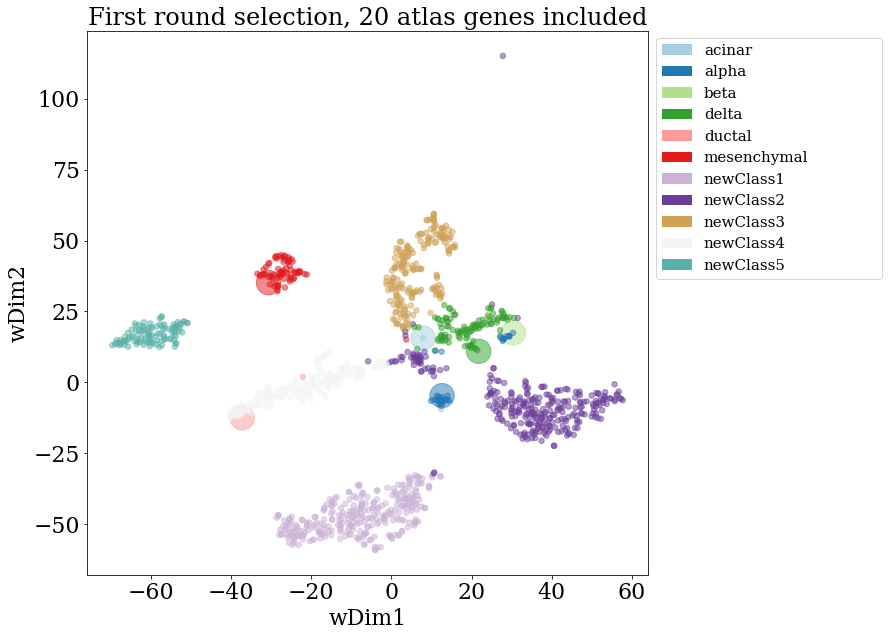

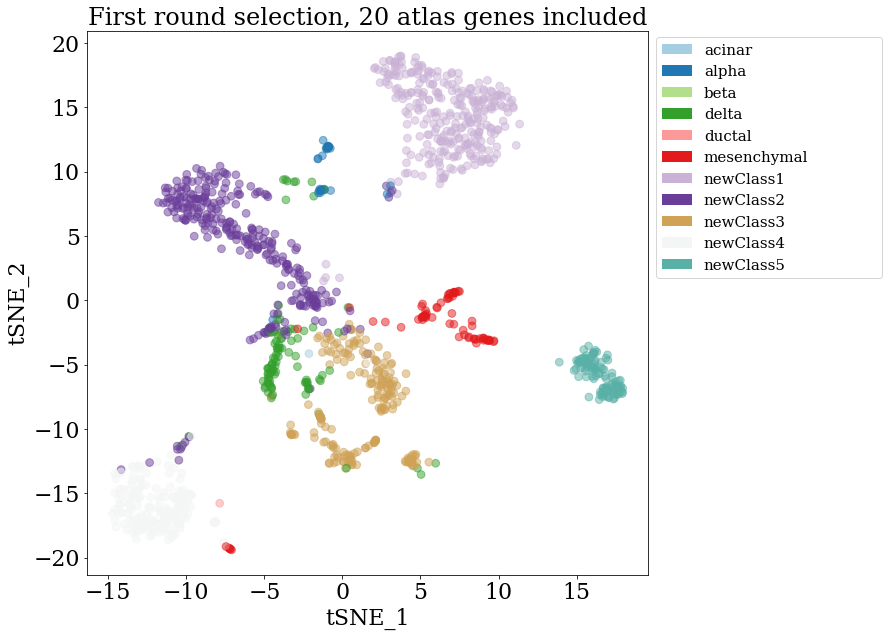

In [86]:
#post stability classes
values = sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired', 11)[8:10]+sns.color_palette('BrBG',len(valSE)-8)
newlut = dict(zip(valSE,values))
newcolor = ts['new_membership'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
ts.plot.scatter('wDim1','wDim2',s=weights*30
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,valSE,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig(savedir+date+'/semiAnnotateSE_selfEdges_tSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'_postStab.png')
f.savefig(savedir+date+'/semiAnnotateSE_selfEdges_tSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'_postStab.pdf')

idx = tsnedf[6:].index
TuPa_meta.loc[idx,'new_membershipSE_postStab'] = ts.iloc[6:]['new_membership']
# new results mapped onto old tSNE
newlut = dict(zip(valSE,sns.color_palette('Paired', 10)[:6]+sns.color_palette('Paired',12)[8:10]+sns.color_palette('BrBG',len(valSE)-8)))
newcolor = TuPa_meta['new_membershipSE_postStab'].map(newlut)

f,ax = plt.subplots(figsize=(12,10))
TuPa_meta.plot.scatter('tSNE_1','tSNE_2',s=60
                    ,alpha=.5,color=newcolor,ax=ax)
for x,y in newlut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles,labels,bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.title('First round selection, '+str(atlasgenes)+' atlas genes included')
plt.gcf().subplots_adjust(left=.1,right=0.75)
f.savefig(savedir+date+'/semiAnnotate_selfEdges_origtSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'_postStab.png')
f.savefig(savedir+date+'/semiAnnotate_selfEdges_origtSNE_'+date+'_nPCs='+str(n_pcs)+'_thresNeigh='+str(thresn)+'_respar='+str(respar)+'_postStab.pdf')

In [87]:
matrix_feature_selected.to_csv(savedir+date+'/feature_selected_matrix_'+date+'.csv')
TuPa_meta.to_csv(savedir+date+'/new_cells_metadata_'+date+'.csv')
tsnedf.to_csv(savedir+date+'/tsnedf_noselfEdging_'+date+'.csv')
tsnedfSE.to_csv(savedir+date+'/tsnedf_selfEdging_'+date+'.csv')
ts.to_csv(savedir+date+'/tsnedf_selfEdging_postStab_'+date+'.csv')

In [88]:
cluster_pair_df = sam.make_pairdf(1-average_df,2,ts)

---------------------------------------
Making list of edges with -100% correlation and up
Max 2 edges per cell.
Found 1298 edges.
---------------------------------------


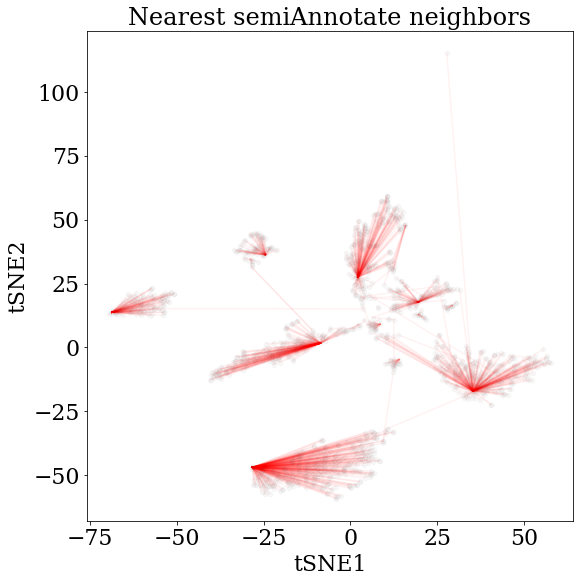

In [89]:
cluster_pair_df#.correlation.sort_values()
#pairs_wSE_95 = li.make_pairs(pd.DataFrame(wdmSE),.05,5)
#olors = sns.color_palette('RdBu_r',5)
f,ax = plt.subplots(figsize=(10,10))
ts.plot.scatter('wDim1','wDim2',figsize=(10,10),ax=ax,alpha=.05,color='gray')
for pair in cluster_pair_df.index:
    xy1 = ts.loc[cluster_pair_df.loc[pair,0]][['wDim1','wDim2']]
    xy2 = ts.loc[cluster_pair_df.loc[pair,1]][['wDim1','wDim2']]
    #corr = pairdf.loc[pair,'correlation']
    ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.05
            ,c='r')

#plt.yticks([]);plt.xticks([])
plt.xlabel('tSNE1'),plt.ylabel('tSNE2')
plt.title('Nearest semiAnnotate neighbors')

plt.gcf().subplots_adjust(right=0.8,bottom=.2)
plt.show()
f.savefig(savedir+date+'/brain_edges_clusterCorr_tsne'+date+'.png')
f.savefig(savedir+date+'/brain_edges_clusterCorr_tsne'+date+'.pdf')

# basic dataset characteristics

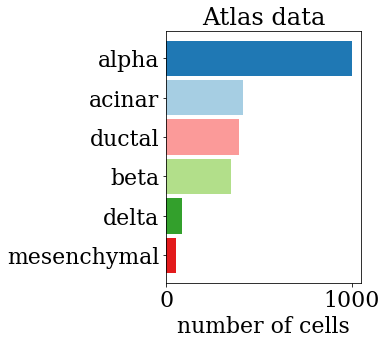

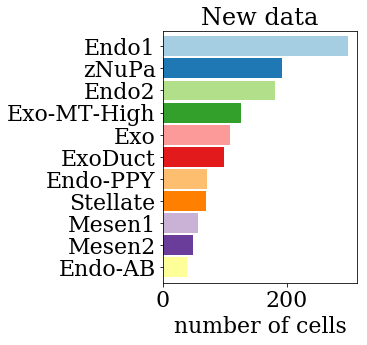

In [90]:
f,ax = plt.subplots(figsize=(6,5))
newlut = dict(zip(np.sort(AA_newmeta['celltypes'].unique()),sns.color_palette('Paired',len(AA_newmeta['celltypes'].unique()))))
colors = AA_newmeta['celltypes'].value_counts().index.map(newlut)
AA_newmeta['celltypes'].value_counts().plot.barh(width=.9,ax=ax,color=colors)
plt.gca().invert_yaxis()
plt.title('Atlas data')
plt.xlabel('number of cells')
plt.gcf().subplots_adjust(left=.5,right=0.95,bottom=.2,top=.9)
f.savefig(savedir+'Atlas_data_original_cellNumBarh.png')
f.savefig(savedir+'Atlas_data_original_cellNumBarh.pdf')

f,ax = plt.subplots(figsize=(6,5))
keys = TuPa_meta['celltypes'].value_counts().index;values=sns.color_palette('Paired',len(keys))
lut = dict(zip(keys,values))
colors = TuPa_meta['celltypes'].value_counts().index.map(lut)
TuPa_meta['celltypes'].value_counts().plot.barh(width=.9,color=colors,ax=ax)
plt.gca().invert_yaxis()
plt.xlabel('number of cells')
plt.title('New data')
plt.gcf().subplots_adjust(left=.5,right=0.95,bottom=.2,top=.9)
f.savefig(savedir+'New_data_original_cellNumBarh.png')
f.savefig(savedir+'New_data_original_cellNumBarh.pdf')

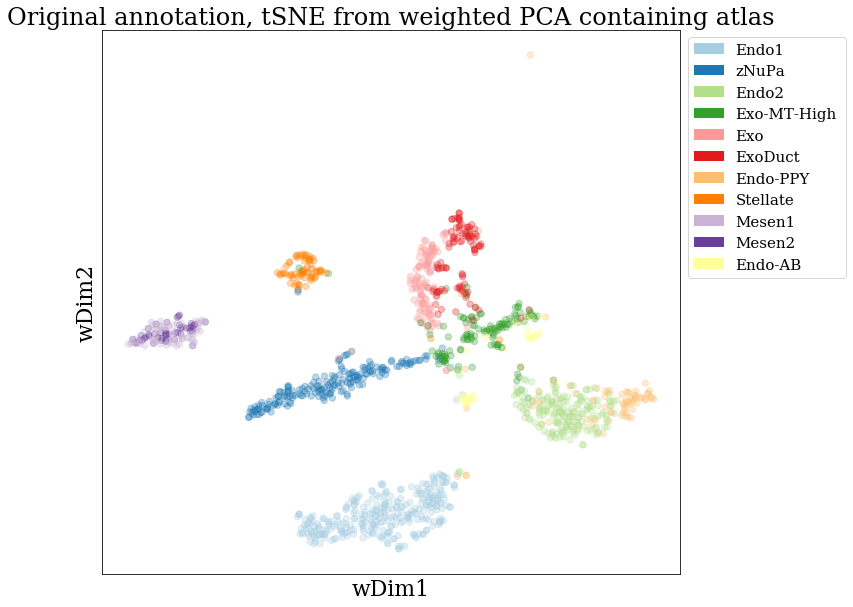

In [91]:
tsnedfSE
newlut
keys = list(tsnedfSE[:6].index)+list(set(tsnedfSE.iloc[6:]['original_membership']).difference(set(tsnedfSE[:6].index)))
values = sns.color_palette('Paired',12)+sns.color_palette('BrBG',len(keys)-12)
keys = TuPa_meta['celltypes'].value_counts().index;values=sns.color_palette('Paired',len(keys))

lut = dict(zip(keys,values))
colors = tsnedfSE[6:].original_membership.map(lut)

f = plt.figure(figsize=(11,10))
gs = gridspec.GridSpec(1,1)
ax = f.add_subplot(gs[0,0])
tsnedfSE[6:].plot.scatter('wDim1','wDim2',ax=ax,color=colors,s=40,alpha=.3)#,label=colors.keys)
for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
    plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .3, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.yticks([]);plt.xticks([])
plt.title('Original annotation, tSNE from weighted PCA containing atlas')
plt.gcf().subplots_adjust(left=.05,right=0.78)
plt.show()
f.savefig(savedir+date+'/tSNE_weightedPCA_originalAnnotation.png')
f.savefig(savedir+date+'/tSNE_weightedPCA_originalAnnotation.pdf')

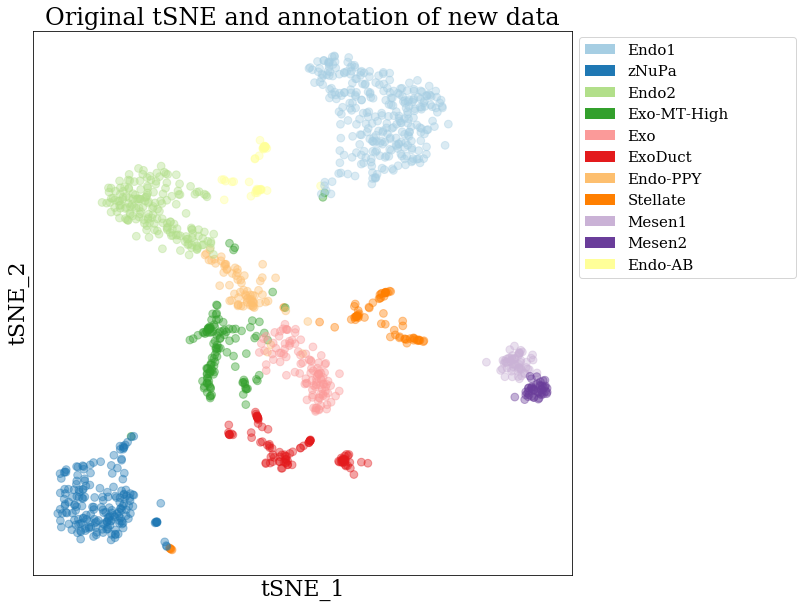

In [92]:
keys = TuPa_meta['celltypes'].value_counts().index;values=sns.color_palette('Paired',len(keys))
lut = dict(zip(keys,values))
colors = TuPa_meta['celltypes'].map(lut)

f,ax = plt.subplots(figsize=(11,10))
TuPa_meta.plot.scatter('tSNE_1','tSNE_2',c=colors,ax=ax,alpha=.4,s=60)

for x,y in lut.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handles, labels = ax.get_legend_handles_labels()
    #plt.legend(handles[:],labels[:],bbox_to_anchor=(-0.0, 1.08, 1., .102), loc=2,
plt.legend(handles[:],labels[:],bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.yticks([]);plt.xticks([])
plt.title('Original tSNE and annotation of new data')
plt.gcf().subplots_adjust(left=.05,right=0.73)
f.savefig(savedir+'tSNE_original_oldAnnotation_.png')
f.savefig(savedir+'tSNE_original_oldAnnotation_.pdf')

# plot edge length vs correlation as scatter
# colored by inter or intra class edge 

In [93]:
wdmSEdf = pd.DataFrame(wdmSE)
pairdf = sam.make_pairdf(wdmSEdf,5,ts)

---------------------------------------
Making list of edges with -100% correlation and up
Max 5 edges per cell.
Found 5192 edges.
---------------------------------------


In [94]:
pairdf.head()

,0,1,edge_type,correlation,distance,edge_length
0,0,1252,inter_class,0.965833,0.034167,0.046878
1,0,876,intra_class,0.281121,0.718879,19.115326
2,0,191,intra_class,0.266367,0.733633,22.273118
3,0,1229,intra_class,0.250873,0.749127,30.511932
4,1,1285,inter_class,0.935091,0.064909,0.885538


In [95]:
pairdf.edge_type.value_counts()

inter_class    5110
intra_class      82
Name: edge_type, dtype: int64

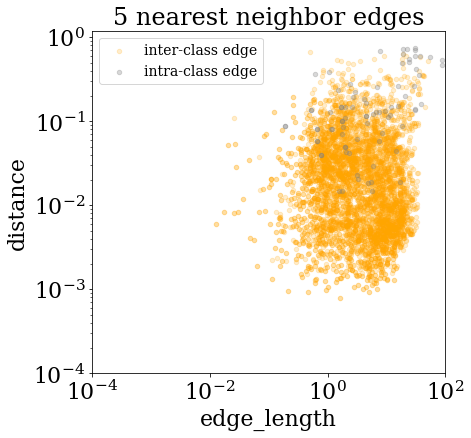

In [96]:
lut = {'inter_class':'orange','intra_class':'gray'}
cols = pairdf['edge_type'].map(lut)
f,ax = plt.subplots()
pairdf[pairdf['edge_type'].str.contains('inter')].plot.scatter('edge_length','distance',alpha=.2,figsize=(7,7),color='orange',label='inter-class edge',ax=ax)
pairdf[pairdf['edge_type'].str.contains('intra')].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color='gray',label='intra-class edge',ax=ax)
plt.yscale('log');plt.xscale('log')
plt.ylim(.0001,1.2)
plt.xlim(.0001,100)
plt.title('5 nearest neighbor edges')
plt.gcf().subplots_adjust(left=0.2,bottom=.2)
f.savefig(savedir+date+'/dist_edgelength.png')
f.savefig(savedir+date+'/dist_edgelength.pdf')

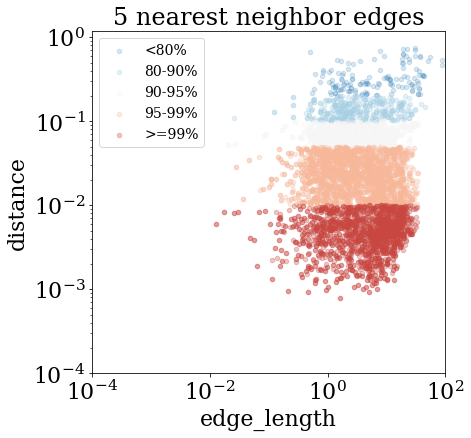

In [97]:
#lut = {'inter_class':'orange','intra_class':'gray'}
#cols = pairdf['edge_type'].map(lut)
colors = sns.color_palette('RdBu_r',5)
f,ax = plt.subplots()
pairdf[pairdf['correlation']<.8].plot.scatter('edge_length','distance',alpha=.2,figsize=(7,7),color=colors[0],label='<80%',ax=ax)
pairdf[(pairdf['correlation']<.9)&(pairdf['correlation']>=.8)].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color=colors[1],label='80-90%',ax=ax)
pairdf[(pairdf['correlation']<.95)&(pairdf['correlation']>=.9)].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color=colors[2],label='90-95%',ax=ax)
pairdf[(pairdf['correlation']<.99)&(pairdf['correlation']>=.95)].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color=colors[3],label='95-99%',ax=ax)
pairdf[pairdf['correlation']>=.99].plot.scatter('edge_length','distance',alpha=.3,figsize=(7,7),color=colors[4],label='>=99%',ax=ax)
plt.yscale('log');plt.xscale('log')
plt.ylim(.0001,1.2)
plt.xlim(.0001,100)
plt.title('5 nearest neighbor edges')
plt.gcf().subplots_adjust(left=0.2,bottom=.2)
f.savefig(savedir+date+'/dist_edgelength_corrcol.png')
f.savefig(savedir+date+'/dist_edgelength_corrcol.pdf')

# plot edges colored by correlation

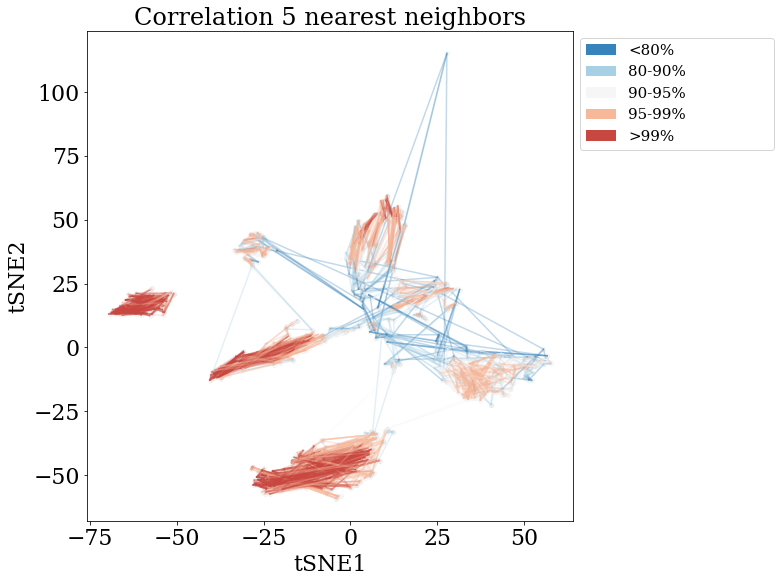

In [98]:
#pairs_wSE_95 = li.make_pairs(pd.DataFrame(wdmSE),.05,5)
colors = sns.color_palette('RdBu_r',5)
f,ax = plt.subplots(figsize=(10,10))
tsnedf.plot.scatter('wDim1','wDim2',figsize=(10,10),ax=ax,alpha=.05,color='gray')
for pair in pairdf.index:
    xy1 = tsnedfSE.iloc[pairdf.loc[pair,0]][['wDim1','wDim2']]
    xy2 = tsnedfSE.iloc[pairdf.loc[pair,1]][['wDim1','wDim2']]
    corr = pairdf.loc[pair,'correlation']
    if corr<.8:
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[0])
    elif (corr>=.8) & (corr<.9):
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[1])
    elif (corr>=.9) & (corr<.95):
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[2])
    elif (corr>=.95) & (corr<.99):
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[3])
    elif corr>=.99:
        ax.plot([xy1[0],xy2[0]],[xy1[1],xy2[1]],alpha=.3
            ,c=colors[4])
#
#plt.yticks([]);plt.xticks([])
handles = ['<80%','80-90%','90-95%','95-99%','>99%']
labs = [f for f in colors]
dictcorr = dict(zip(handles,labs))
for x,y in dictcorr.items():
    plt.bar(0,0,color=y,label=x,alpha=1)
    handle, labels = ax.get_legend_handles_labels()
    

plt.xlabel('tSNE1'),plt.ylabel('tSNE2')
plt.title('Correlation 5 nearest neighbors')
plt.legend(handle,handles, bbox_to_anchor=(1, .9, .43, .102), loc=2,
               ncol=1, mode="expand",fontsize=15)
plt.gcf().subplots_adjust(right=0.8,bottom=.2)
plt.show()
f.savefig(savedir+date+'/brain_edges_corr_tsne'+date+'.png')
f.savefig(savedir+date+'/brain_edges_corr_tsne'+date+'.pdf')

# Sankey diagram plotting

In [99]:
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_selfEgdes_'+date
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
sank.sankey_BB(ts[6:],**kw)

In [100]:
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_NOselfEgdes_'+date
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
sank.sankey_BB(tsnedf[6:],**kw)

# Dot plot creation

In [101]:
keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdes_top5'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanelSE,roSE,coSE,genes_OD5 = sdot.make_dotplot(matrix_feature_selected,ts,5,**kw)

keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdes_top10'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanelSE1,roSE,coSE,genes_OD10 = sdot.make_dotplot(matrix_feature_selected,ts,10,**kw)

keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdes_top15'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanelSE,roSE,coSE,genes_OD15 = sdot.make_dotplot(matrix_feature_selected,ts,15,**kw)

keys = ['left_column', 'right_column','figure_name','savedir','close_plot']
valu = ['original_membership','new_membership','pancreas_SelfEgdes_top20'
        ,savedir+date+'/',True]
kw = dict(zip(keys,valu))
genePanelSE,roSE,coSE,genes_OD20 = sdot.make_dotplot(matrix_feature_selected,ts,20,**kw)

/home/bojk/Data/minimeta_pyfiles/semiAnnotate_dotplot.py:141: RuntimeWarning: divide by zero encountered in log2
  plt.scatter(xgrid,np.ones(len(xgrid))*i,s=np.log2(temp).multiply(70),alpha=.8)
/home/bojk/miniconda3/envs/py360/lib/python3.6/site-packages/matplotlib/collections.py:874: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
